# Self-Driving Car Engineer Nanodegree
[![Udacity - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)


## Project: **Advanced Lane Finding** 

## 1. Camera Calibration

### Import Statements

In [1]:
import os

import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pickle as pl

### Initialisation

In [2]:
#get image names
cam_cal_image_list = os.listdir("camera_cal/")

#create output directories if not existing
for path in ["output_images/camera_cal",\
             "output_images/intermediate_examples_for_readme",
             "params/"]:

    if not os.path.exists(path):
        os.makedirs(path)


### Calibration

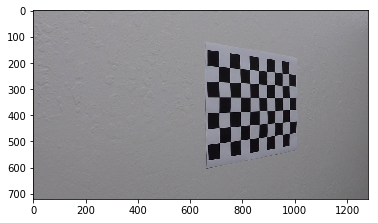

In [3]:
#read and visualize one image as
img = mpimg.imread("camera_cal/"+cam_cal_image_list[0])
plt.imshow(img)

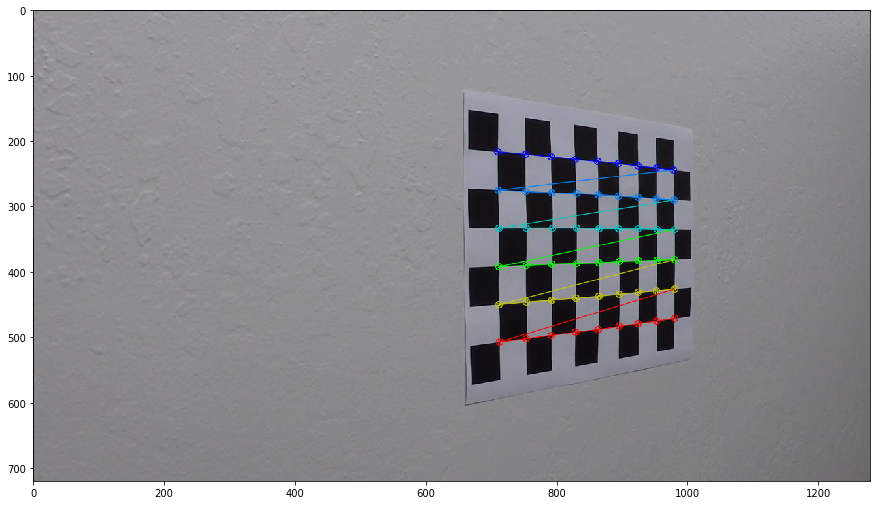

In [4]:
#determine the number of horizontal and vertical corners in the image
#by counting
nx = 9
ny = 6

#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#find chessboard corners in grayscale image
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#draw detected corners on the original image
img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

#show original image with detected corners and save this image as example to be used in the readme
plt.figure(figsize = (15, 20))
plt.imshow(img)
mpimg.imsave("output_images/intermediate_examples_for_readme/"+cam_cal_image_list[0], img)

In [8]:
#initialise objectpoints and imagepoints as empty lists
objpoints = []
imgpoints = []

#initialise idxpoints as list of the x and y indices and 
# all z's set to (assuming a plane) 0
idxpoints = np.zeros((nx*ny, 3), np.float32)
idxpoints[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

#iterate over all images to determine the camera calibration parameters
for imgname in cam_cal_image_list:
    
    #read image
    img = mpimg.imread("camera_cal/"+imgname)
    
    #convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #find chessboard corners in grayscale image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    #if all expected corners could be found in the image the value of ret will be true
    #therefore, we check if all corners could be detected and append the positions in the image and the actual indizes in the 
    # chessboard to the respective lists    
    if ret:
        objpoints.append(idxpoints)
        imgpoints.append(corners)
        
#perform camera calibration with collected image and actual chessboard positions
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#safe camera parameters
with open ('params/mtx.pl', 'wb') as f:
    pl.dump(mtx, f)
with open ('params/dist.pl', 'wb') as f:
    pl.dump(dist, f)

In [9]:
#iterate over all images and undistort them
for imgname in cam_cal_image_list:    
    # read image
    img = mpimg.imread("camera_cal/"+imgname)
    
    # undistort the image and save it
    dst = cv2.undistort(img, mtx, dist, None, None)
    mpimg.imsave("output_images/camera_cal/"+imgname, dst)

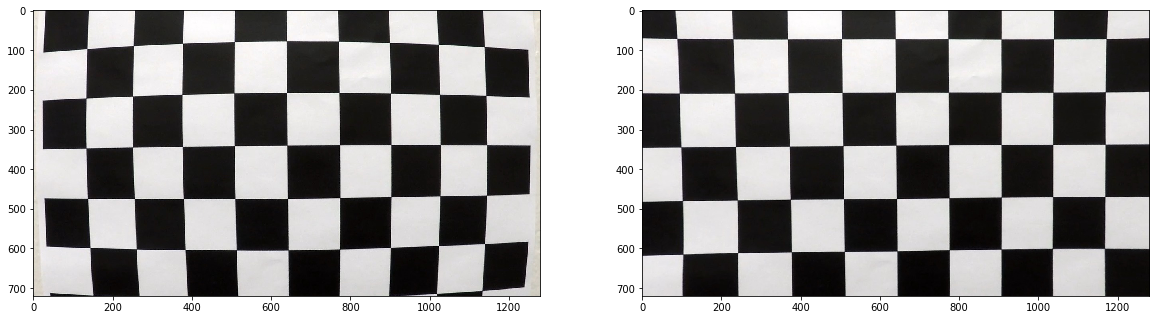

In [10]:
#show the original and the calibrated image of one example
img = mpimg.imread("camera_cal/calibration1.jpg")
dst = cv2.undistort(img, mtx, dist, None, None)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img)
ax2.imshow(dst)